# Liquity Explorer

## Questions
- Where are the `Troves`? Which file?
- User can redeem 100 LUSD for \$100 worth of eth. How is the ETH price calculated in autonomic way without oracles?
- What is a redemption?

## Questions (Answered)
- Is stabilitiy pool the same thing as active pool? No, they are different contracts.

## Things to query
- Historical recovery mode dates
- Troves near liquidation
- Liquidated troves
- In/Out flow of ETH in the protocol
- ~~Top 10 biggest troves~~
- LQTY inflow/outflow
- Query specific address collateral
- Query a list of troves created by a specific address
- Query current fee based on the base rate
- Draw a diagram of historical fees and base rates
- Draw a diagram of historical number of troves (maybe some correlations with eth price?)
- Current balance/reserves of stability pool active pool
- Verbal description of latest transactions
- What is the average leverage in the protocol?

## Contracts
- Stability Pool
- Active Pool

## Function calls to follow
- Liquidations happen via `TroveManager#liquidateTroves` and `TroveManager#batchLiquidateTroves`

trovemanager.functions.Troves(kchmielewski.eth).coll

In [37]:
from dotenv import load_dotenv
import datetime
import ipywidgets as widgets
import math
from matplotlib import pyplot as plt
import os
import pandas as pd
from web3 import Web3

In [3]:
# Load environment variables from .env file
load_dotenv()
MAINNET_RPC_URL = os.environ.get('MAINNET_RPC_URL')
web3 = Web3(Web3.HTTPProvider(MAINNET_RPC_URL))

[**Trove Manager**](https://etherscan.io/address/0xA39739EF8b0231DbFA0DcdA07d7e29faAbCf4bb2)

In [5]:
trove_manager_address = '0xA39739EF8b0231DbFA0DcdA07d7e29faAbCf4bb2'
trove_manager_abi = '[{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_activePoolAddress","type":"address"}],"name":"ActivePoolAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_baseRate","type":"uint256"}],"name":"BaseRateUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_newBorrowerOperationsAddress","type":"address"}],"name":"BorrowerOperationsAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_collSurplusPoolAddress","type":"address"}],"name":"CollSurplusPoolAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_defaultPoolAddress","type":"address"}],"name":"DefaultPoolAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_gasPoolAddress","type":"address"}],"name":"GasPoolAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_lqtyStakingAddress","type":"address"}],"name":"LQTYStakingAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_lqtyTokenAddress","type":"address"}],"name":"LQTYTokenAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_L_ETH","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_L_LUSDDebt","type":"uint256"}],"name":"LTermsUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_newLUSDTokenAddress","type":"address"}],"name":"LUSDTokenAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_lastFeeOpTime","type":"uint256"}],"name":"LastFeeOpTimeUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_liquidatedDebt","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_liquidatedColl","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_collGasCompensation","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_LUSDGasCompensation","type":"uint256"}],"name":"Liquidation","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"previousOwner","type":"address"},{"indexed":true,"internalType":"address","name":"newOwner","type":"address"}],"name":"OwnershipTransferred","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_newPriceFeedAddress","type":"address"}],"name":"PriceFeedAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_attemptedLUSDAmount","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_actualLUSDAmount","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_ETHSent","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_ETHFee","type":"uint256"}],"name":"Redemption","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_sortedTrovesAddress","type":"address"}],"name":"SortedTrovesAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_stabilityPoolAddress","type":"address"}],"name":"StabilityPoolAddressChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_totalStakesSnapshot","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_totalCollateralSnapshot","type":"uint256"}],"name":"SystemSnapshotsUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_newTotalStakes","type":"uint256"}],"name":"TotalStakesUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_borrower","type":"address"},{"indexed":false,"internalType":"uint256","name":"_newIndex","type":"uint256"}],"name":"TroveIndexUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"_borrower","type":"address"},{"indexed":false,"internalType":"uint256","name":"_debt","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_coll","type":"uint256"},{"indexed":false,"internalType":"enum TroveManager.TroveManagerOperation","name":"_operation","type":"uint8"}],"name":"TroveLiquidated","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_L_ETH","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_L_LUSDDebt","type":"uint256"}],"name":"TroveSnapshotsUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"_borrower","type":"address"},{"indexed":false,"internalType":"uint256","name":"_debt","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_coll","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_stake","type":"uint256"},{"indexed":false,"internalType":"enum TroveManager.TroveManagerOperation","name":"_operation","type":"uint8"}],"name":"TroveUpdated","type":"event"},{"inputs":[],"name":"BETA","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"BOOTSTRAP_PERIOD","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"BORROWING_FEE_FLOOR","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"CCR","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"DECIMAL_PRECISION","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"LUSD_GAS_COMPENSATION","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"L_ETH","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"L_LUSDDebt","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"MAX_BORROWING_FEE","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"MCR","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"MINUTE_DECAY_FACTOR","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"MIN_NET_DEBT","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"NAME","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"PERCENT_DIVISOR","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"REDEMPTION_FEE_FLOOR","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"SECONDS_IN_ONE_MINUTE","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"","type":"uint256"}],"name":"TroveOwners","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"Troves","outputs":[{"internalType":"uint256","name":"debt","type":"uint256"},{"internalType":"uint256","name":"coll","type":"uint256"},{"internalType":"uint256","name":"stake","type":"uint256"},{"internalType":"enum TroveManager.Status","name":"status","type":"uint8"},{"internalType":"uint128","name":"arrayIndex","type":"uint128"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"_100pct","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"activePool","outputs":[{"internalType":"contract IActivePool","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"addTroveOwnerToArray","outputs":[{"internalType":"uint256","name":"index","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"applyPendingRewards","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"baseRate","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address[]","name":"_troveArray","type":"address[]"}],"name":"batchLiquidateTroves","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"borrowerOperationsAddress","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_price","type":"uint256"}],"name":"checkRecoveryMode","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"closeTrove","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"decayBaseRateFromBorrowing","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"},{"internalType":"uint256","name":"_collDecrease","type":"uint256"}],"name":"decreaseTroveColl","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"},{"internalType":"uint256","name":"_debtDecrease","type":"uint256"}],"name":"decreaseTroveDebt","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"defaultPool","outputs":[{"internalType":"contract IDefaultPool","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_LUSDDebt","type":"uint256"}],"name":"getBorrowingFee","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_LUSDDebt","type":"uint256"}],"name":"getBorrowingFeeWithDecay","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getBorrowingRate","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getBorrowingRateWithDecay","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"},{"internalType":"uint256","name":"_price","type":"uint256"}],"name":"getCurrentICR","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"getEntireDebtAndColl","outputs":[{"internalType":"uint256","name":"debt","type":"uint256"},{"internalType":"uint256","name":"coll","type":"uint256"},{"internalType":"uint256","name":"pendingLUSDDebtReward","type":"uint256"},{"internalType":"uint256","name":"pendingETHReward","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getEntireSystemColl","outputs":[{"internalType":"uint256","name":"entireSystemColl","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getEntireSystemDebt","outputs":[{"internalType":"uint256","name":"entireSystemDebt","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"getNominalICR","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"getPendingETHReward","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"getPendingLUSDDebtReward","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_ETHDrawn","type":"uint256"}],"name":"getRedemptionFeeWithDecay","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getRedemptionRate","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getRedemptionRateWithDecay","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_price","type":"uint256"}],"name":"getTCR","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"getTroveColl","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"getTroveDebt","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_index","type":"uint256"}],"name":"getTroveFromTroveOwnersArray","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"getTroveOwnersCount","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"getTroveStake","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"getTroveStatus","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"hasPendingRewards","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"},{"internalType":"uint256","name":"_collIncrease","type":"uint256"}],"name":"increaseTroveColl","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"},{"internalType":"uint256","name":"_debtIncrease","type":"uint256"}],"name":"increaseTroveDebt","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"isOwner","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"lastETHError_Redistribution","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"lastFeeOperationTime","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"lastLUSDDebtError_Redistribution","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"liquidate","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"_n","type":"uint256"}],"name":"liquidateTroves","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"lqtyStaking","outputs":[{"internalType":"contract ILQTYStaking","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"lqtyToken","outputs":[{"internalType":"contract ILQTYToken","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"lusdToken","outputs":[{"internalType":"contract ILUSDToken","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"priceFeed","outputs":[{"internalType":"contract IPriceFeed","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_LUSDamount","type":"uint256"},{"internalType":"address","name":"_firstRedemptionHint","type":"address"},{"internalType":"address","name":"_upperPartialRedemptionHint","type":"address"},{"internalType":"address","name":"_lowerPartialRedemptionHint","type":"address"},{"internalType":"uint256","name":"_partialRedemptionHintNICR","type":"uint256"},{"internalType":"uint256","name":"_maxIterations","type":"uint256"},{"internalType":"uint256","name":"_maxFeePercentage","type":"uint256"}],"name":"redeemCollateral","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"removeStake","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"rewardSnapshots","outputs":[{"internalType":"uint256","name":"ETH","type":"uint256"},{"internalType":"uint256","name":"LUSDDebt","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrowerOperationsAddress","type":"address"},{"internalType":"address","name":"_activePoolAddress","type":"address"},{"internalType":"address","name":"_defaultPoolAddress","type":"address"},{"internalType":"address","name":"_stabilityPoolAddress","type":"address"},{"internalType":"address","name":"_gasPoolAddress","type":"address"},{"internalType":"address","name":"_collSurplusPoolAddress","type":"address"},{"internalType":"address","name":"_priceFeedAddress","type":"address"},{"internalType":"address","name":"_lusdTokenAddress","type":"address"},{"internalType":"address","name":"_sortedTrovesAddress","type":"address"},{"internalType":"address","name":"_lqtyTokenAddress","type":"address"},{"internalType":"address","name":"_lqtyStakingAddress","type":"address"}],"name":"setAddresses","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"},{"internalType":"uint256","name":"_num","type":"uint256"}],"name":"setTroveStatus","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"sortedTroves","outputs":[{"internalType":"contract ISortedTroves","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"stabilityPool","outputs":[{"internalType":"contract IStabilityPool","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalCollateralSnapshot","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalStakes","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalStakesSnapshot","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"updateStakeAndTotalStakes","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_borrower","type":"address"}],"name":"updateTroveRewardSnapshots","outputs":[],"stateMutability":"nonpayable","type":"function"}]'

In [6]:
trove_manager = web3.eth.contract(address=trove_manager_address, abi=trove_manager_abi)

`Troves` mapping:
trove owner => Trove

In [20]:
result = trove_manager.functions.Troves('0x8cFFd9941D489E8Ed14868c692456ED4CD0025c0').call()
# Debt, Coll, Stake, Status, Array Index
print (f"Debt: {result[0]}, \nCollateral: {result[1]}, \nStake: {result[2]}, \nStatus: {result[3]}, \nIndex: {result[4]}")

Debt: 3215727482212122152000, 
Collateral: 7000000000000000000, 
Stake: 7000000000000000000, 
Status: 1, 
Index: 1078


### Total Stakes in the protocol (is this ETH or LQTY?)

In [29]:
trove_manager_total_staked = trove_manager.functions.totalStakes().call()
print(f"Total ETH staked in the protocol: {web3.from_wei(trove_manager_total_staked, 'ether')} ETH")

Total ETH staked in the protocol: 403191.91180524749156262 ETH


### LQTY Staked in the protocol

The `LQTY` token has 18 decimals

The `lqtyStaking` contract receives ETH fees from redemptions and LUSD fees from new debt issuance.

In [35]:
lqty_staking_address = '0x4f9Fbb3f1E99B56e0Fe2892e623Ed36A76Fc605d'
lqty_staking_abi = '[{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_activePoolAddress","type":"address"}],"name":"ActivePoolAddressSet","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_borrowerOperationsAddress","type":"address"}],"name":"BorrowerOperationsAddressSet","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_account","type":"address"},{"indexed":false,"internalType":"uint256","name":"_amount","type":"uint256"}],"name":"EtherSent","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_F_ETH","type":"uint256"}],"name":"F_ETHUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_F_LUSD","type":"uint256"}],"name":"F_LUSDUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_lqtyTokenAddress","type":"address"}],"name":"LQTYTokenAddressSet","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_lusdTokenAddress","type":"address"}],"name":"LUSDTokenAddressSet","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"previousOwner","type":"address"},{"indexed":true,"internalType":"address","name":"newOwner","type":"address"}],"name":"OwnershipTransferred","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"staker","type":"address"},{"indexed":false,"internalType":"uint256","name":"newStake","type":"uint256"}],"name":"StakeChanged","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_staker","type":"address"},{"indexed":false,"internalType":"uint256","name":"_F_ETH","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"_F_LUSD","type":"uint256"}],"name":"StakerSnapshotsUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"staker","type":"address"},{"indexed":false,"internalType":"uint256","name":"LUSDGain","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"ETHGain","type":"uint256"}],"name":"StakingGainsWithdrawn","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"uint256","name":"_totalLQTYStaked","type":"uint256"}],"name":"TotalLQTYStakedUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"_troveManager","type":"address"}],"name":"TroveManagerAddressSet","type":"event"},{"inputs":[],"name":"DECIMAL_PRECISION","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"F_ETH","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"F_LUSD","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"NAME","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"activePoolAddress","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"borrowerOperationsAddress","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_user","type":"address"}],"name":"getPendingETHGain","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_user","type":"address"}],"name":"getPendingLUSDGain","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_ETHFee","type":"uint256"}],"name":"increaseF_ETH","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"uint256","name":"_LUSDFee","type":"uint256"}],"name":"increaseF_LUSD","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"isOwner","outputs":[{"internalType":"bool","name":"","type":"bool"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"lqtyToken","outputs":[{"internalType":"contract ILQTYToken","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"lusdToken","outputs":[{"internalType":"contract ILUSDToken","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_lqtyTokenAddress","type":"address"},{"internalType":"address","name":"_lusdTokenAddress","type":"address"},{"internalType":"address","name":"_troveManagerAddress","type":"address"},{"internalType":"address","name":"_borrowerOperationsAddress","type":"address"},{"internalType":"address","name":"_activePoolAddress","type":"address"}],"name":"setAddresses","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"snapshots","outputs":[{"internalType":"uint256","name":"F_ETH_Snapshot","type":"uint256"},{"internalType":"uint256","name":"F_LUSD_Snapshot","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_LQTYamount","type":"uint256"}],"name":"stake","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"","type":"address"}],"name":"stakes","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"totalLQTYStaked","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"troveManagerAddress","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_LQTYamount","type":"uint256"}],"name":"unstake","outputs":[],"stateMutability":"nonpayable","type":"function"},{"stateMutability":"payable","type":"receive"}]'
lqty_staking = web3.eth.contract(address=lqty_staking_address, abi=lqty_staking_abi)

lqty_staking_total_staked = lqty_staking.functions.totalLQTYStaked().call()
print(f"Total LQTY tokens staked in lqtyStaking contract: {lqty_staking_total_staked / 10e18} tokens")

Total LQTY tokens staked in lqtyStaking contract: 4644626.861633411 tokens


### Historical number of `Troves`

60 seconds in 1 minute
3600 seconds in 1 hour
86400 seconds in 1 day
2678400 seconds in 1 month (31 days)

Block on Ethereum is mined every 15 seconds

In [56]:
2678400 / 15

178560.0

The 178560 is the number of blocks created every 31 days. We will use this number to get a rough estimate of what is happening in Liquity every month.

In [63]:
df = pd.DataFrame(columns=['Block', 'Trove Count'])
start_block = 12178557
end_block = web3.eth.block_number
print(end_block)

while start_block <= end_block:
    trove_count = trove_manager.functions.getTroveOwnersCount().call(block_identifier=start_block)
    print(trove_count)
    df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)
    start_block += 178560

18048748
0


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1074


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


642


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


809


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


928


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1045


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1085


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1157


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1264


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1281


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1260


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1024


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


992


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


994


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1006


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


824


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


507


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


554


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


633


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


628


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


688


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


849


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


870


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


917


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


917


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


900


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


950


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1079


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1147


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1166


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1209


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1264


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


1324
       Block Trove Count
0   12178557           0
1   12357117        1074
2   12535677         642
3   12714237         809
4   12892797         928
5   13071357        1045
6   13249917        1085
7   13428477        1157
8   13607037        1264
9   13785597        1281
10  13964157        1260
11  14142717        1024
12  14321277         992
13  14499837         994
14  14678397        1006
15  14856957         824
16  15035517         507
17  15214077         554
18  15392637         633
19  15571197         628
20  15749757         688
21  15928317         849
22  16106877         870
23  16285437         917
24  16463997         917
25  16642557         900
26  16821117         950
27  16999677        1079
28  17178237        1147
29  17356797        1166
30  17535357        1209
31  17713917        1264
32  17892477        1324


/var/folders/0j/svzs9g_13zv8q4msp9cmdq4w0000gn/T/ipykernel_60633/49314315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Block': start_block, 'Trove Count': trove_count}, ignore_index=True)


In [64]:
print(df)

       Block Trove Count
0   12178557           0
1   12357117        1074
2   12535677         642
3   12714237         809
4   12892797         928
5   13071357        1045
6   13249917        1085
7   13428477        1157
8   13607037        1264
9   13785597        1281
10  13964157        1260
11  14142717        1024
12  14321277         992
13  14499837         994
14  14678397        1006
15  14856957         824
16  15035517         507
17  15214077         554
18  15392637         633
19  15571197         628
20  15749757         688
21  15928317         849
22  16106877         870
23  16285437         917
24  16463997         917
25  16642557         900
26  16821117         950
27  16999677        1079
28  17178237        1147
29  17356797        1166
30  17535357        1209
31  17713917        1264
32  17892477        1324


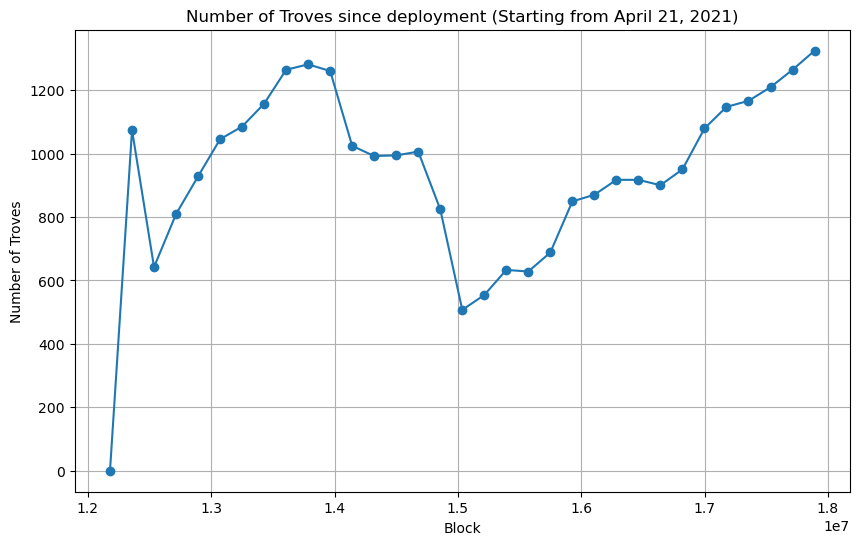

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(df['Block'], df['Trove Count'], marker='o')
plt.xlabel('Block')
plt.ylabel('Number of Troves')
plt.title('Number of Troves since deployment (Starting from April 21, 2021)')
plt.grid(True)
plt.show()